In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import sqlite3
import sqlalchemy as sqla
import scipy.stats as st
from scipy.stats import linregress


In [2]:
fire_data = pd.read_csv("./Resources/Fires.csv", dtype={'FIPS_NAME': 'str',
                                                        'COMPLEX_NAME': 'str',
                                                        'FIRE_NAME': 'str',
                                                        'FIRE_CODE': 'str'
                                                       })
fire_data.head()


,OBJECTID,FOD_ID,FPA_ID,FIRE_YEAR,FIPS_NAME,COMPLEX_NAME,FIRE_NAME,FIRE_SIZE,DISCOVERY_DATE,FIRE_CODE,STAT_CAUSE_DESCR,CONT_DATE,STATE,LATITUDE,LONGITUDE,DISCOVERY_TIME,CONT_TIME
0,1,1,FS-1418826,2005,Plumas,NaN,FOUNTAIN,0.10,1970-01-29 09:30:03.500,BJ8K,Miscellaneous,2453403.5,CA,40.036944,-121.005833,1300.0,1730.0
1,2,2,FS-1418827,2004,Placer,NaN,PIGEON,0.25,1970-01-29 09:25:37.500,AAC0,Lightning,2453137.5,CA,38.933056,-120.404444,845.0,1530.0
2,3,3,FS-1418835,2004,El Dorado,NaN,SLACK,0.10,1970-01-29 09:25:56.500,A32W,Debris Burning,2453156.5,CA,38.984167,-120.735556,1921.0,2024.0
3,4,4,FS-1418845,2004,Alpine,NaN,DEER,0.10,1970-01-29 09:26:24.500,NaN,Lightning,2453189.5,CA,38.559167,-119.913333,1600.0,1400.0
4,5,5,FS-1418847,2004,Alpine,NaN,STEVENOT,0.10,1970-01-29 09:26:24.500,NaN,Lightning,2453189.5,CA,38.559167,-119.933056,1600.0,1200.0


In [3]:
fire_data_year_df = fire_data.loc[fire_data["FIRE_YEAR"] == 2015, :]
fire_data_year_df.head()

,OBJECTID,FOD_ID,FPA_ID,FIRE_YEAR,FIPS_NAME,COMPLEX_NAME,FIRE_NAME,FIRE_SIZE,DISCOVERY_DATE,FIRE_CODE,STAT_CAUSE_DESCR,CONT_DATE,STATE,LATITUDE,LONGITUDE,DISCOVERY_TIME,CONT_TIME
1789011,1789012,300200261,FS-6341424,2015,Beaverhead,NaN,LINCOLN,0.10,1970-01-29 10:34:08.500,EKS3,Lightning,2457249.5,MT,45.934167,-113.020833,2319.0,1910.0
1789012,1789013,300200262,FS-6341435,2015,Beaverhead,NaN,BEAR LAKE,6313.00,1970-01-29 10:34:14.500,J2E3,Lightning,NaN,MT,45.515278,-113.245278,2124.0,NaN
1789013,1789014,300200263,FS-6332443,2015,Beaverhead,NaN,GREY,0.25,1970-01-29 10:33:37.500,EKS3,Lightning,2457218.5,MT,45.727222,-112.943889,1019.0,1513.0
1789014,1789015,300200264,FS-6341423,2015,Beaverhead,NaN,JUMBO MOUNTAIN,0.10,1970-01-29 10:34:08.500,EKS3,Lightning,NaN,MT,45.455556,-113.749722,1855.0,NaN
1789015,1789016,300200265,FS-6351412,2015,Beaverhead,NaN,DEADMAN TRAIL,0.10,1970-01-29 10:34:54.500,J32N,Miscellaneous,2457321.5,MT,44.416667,-112.843333,1136.0,1000.0


In [4]:
fires = fire_data_year_df.groupby("STATE")
fires = fires.count()
fires = fires[["OBJECTID"]]
fires = fires.rename(columns= {"OBJECTID":"Number of Fires"})
fires.sort_index(ascending = True)
fires.head()


,Number of Fires
STATE,
AK,771
AL,2074
AR,1289
AZ,3819
CA,7365


In [5]:
#pie chart by fire cause

cause = fire_data_year_df.groupby("STAT_CAUSE_DESCR")
cause = cause.count()
cause = cause[["OBJECTID"]]
cause = cause.rename(columns = {"OBJECTID": "Number of Fires"})
cause = cause.sort_values(by=['Number of Fires'])
cause

,Number of Fires
STAT_CAUSE_DESCR,
Structure,335
Railroad,370
Fireworks,585
Children,1350
Powerline,1580
Smoking,1884
Campfire,3731
Equipment Use,5484
Missing/Undefined,6276


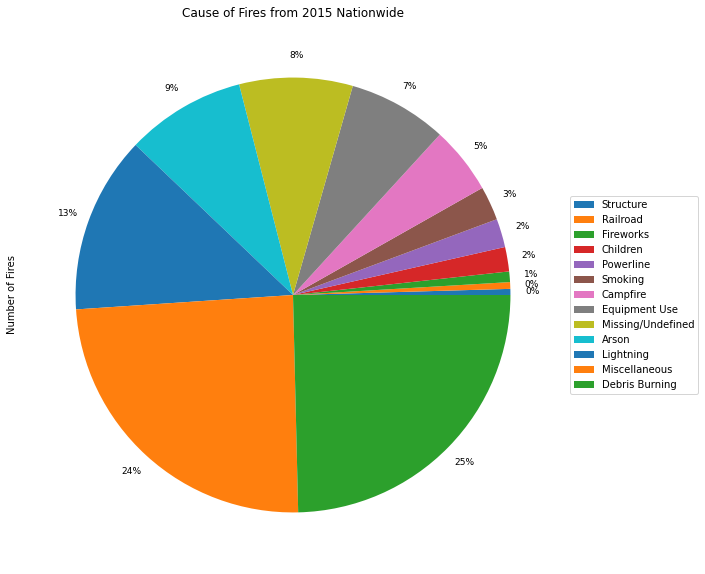

In [6]:
pie_cause = cause.plot(kind = "pie", y="Number of Fires", labeldistance = None, figsize=(20,10), fontsize=9, autopct='%1.0f%%', pctdistance=1.1, title= "Cause of Fires from 2015 Nationwide")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("output/Figure1")

plt.show()

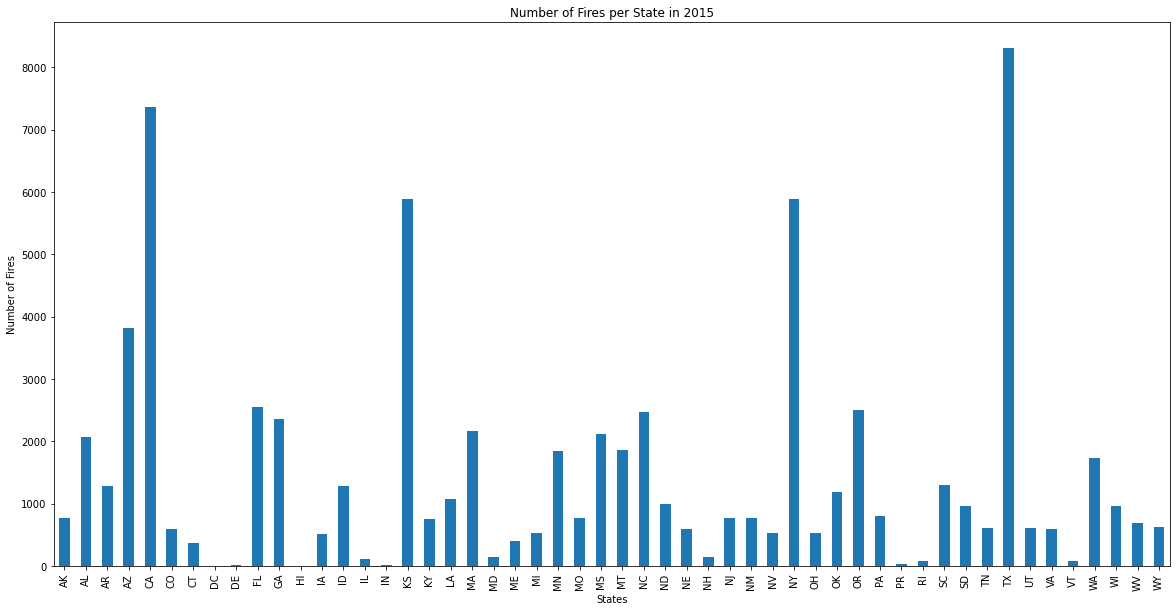

In [7]:
fire_bar = fires.plot(kind = "bar", y="Number of Fires", figsize=(20,10), title= "Number of Fires per State in 2015")

plt.xlabel('States')
plt.ylabel('Number of Fires')
fire_bar.get_legend().remove()
plt.savefig("output/Figure5")
plt.show()

In [8]:
fire_data_year_state_df = fire_data_year_df.loc[fire_data_year_df["STATE"] == "CA", :]
fire_data_year_state_df.head()

,OBJECTID,FOD_ID,FPA_ID,FIRE_YEAR,FIPS_NAME,COMPLEX_NAME,FIRE_NAME,FIRE_SIZE,DISCOVERY_DATE,FIRE_CODE,STAT_CAUSE_DESCR,CONT_DATE,STATE,LATITUDE,LONGITUDE,DISCOVERY_TIME,CONT_TIME
1790382,1790383,300201647,FS-6321072,2015,Alpine,NaN,SAWMILL,0.10,1970-01-29 10:33:31.500,EK1P,Lightning,2457212.5,CA,38.633611,-119.789444,1100.0,1500.0
1790384,1790385,300201649,FS-6356130,2015,Mono,NaN,EAGLE 2,120.00,1970-01-29 10:34:06.500,J1FL,Lightning,2457258.5,CA,38.224722,-119.381944,1417.0,2000.0
1790385,1790386,300201650,FS-6344106,2015,Mono,NaN,GOLDEN GATE,0.25,1970-01-29 10:33:22.500,JUV3,Lightning,2457205.5,CA,38.528056,-119.553333,2124.0,1257.0
1790386,1790387,300201651,FS-6344060,2015,Mono,NaN,LEAVITT,1.00,1970-01-29 10:33:08.500,JST7,Miscellaneous,2457188.5,CA,38.365000,-119.523611,1328.0,1853.0
1790387,1790388,300201652,FS-6319019,2015,Alpine,NaN,VAQUERO,0.10,1970-01-29 10:33:20.500,EK1P,Lightning,2457201.5,CA,38.550833,-119.611667,2200.0,1610.0


In [9]:
total_acre= fire_data_year_state_df.groupby(["FIPS_NAME"]).sum()
total_acre =total_acre.rename(columns = {"FIRE_SIZE": "Total Fire Size (Acres)"})
total_acre.head()

,OBJECTID,FOD_ID,FIRE_YEAR,Total Fire Size (Acres),CONT_DATE,LATITUDE,LONGITUDE,DISCOVERY_TIME,CONT_TIME
FIPS_NAME,,,,,,,,,
Alameda,74170125,12011386990,80600,593.76,98288154.0,1507.708623,-4868.943588,46951.0,49015.0
Alpine,39441662,6604493097,44330,17796.37,41772603.5,848.311300,-2635.183811,34527.0,27516.0
Amador,86541592,14112560785,94705,26.61,100745341.5,1806.685071,-5673.354927,64045.0,57513.0
Butte,411772098,66663344733,447330,2942.14,533218947.5,8792.301636,-26991.450147,316137.0,320306.0
Calaveras,164103808,26724120872,179335,131.18,179375415.5,3400.395528,-10728.024611,124569.0,107405.0


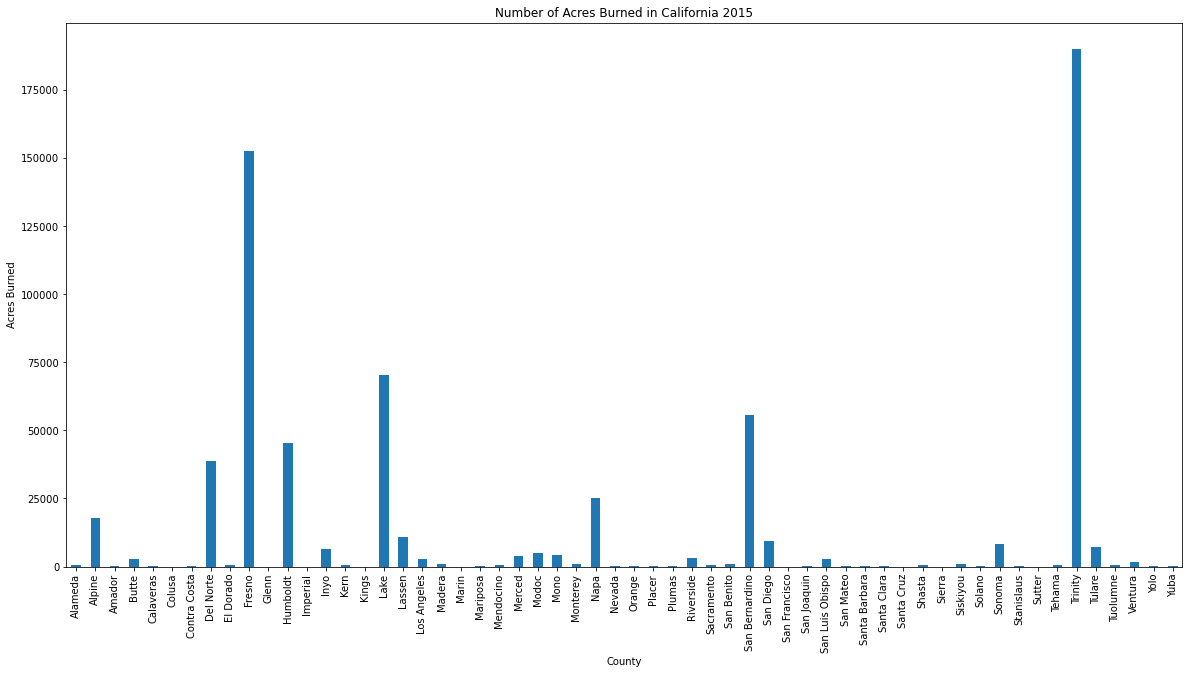

In [10]:
acres_bar = total_acre.plot(kind = "bar", y="Total Fire Size (Acres)", figsize=(20,10), title= "Number of Acres Burned in California 2015")

plt.xlabel('County')
plt.ylabel('Acres Burned')
acres_bar.get_legend().remove()
plt.savefig("output/Figure6")
plt.show()

In [11]:
#pie chart by fire cause

cause1 = fire_data_year_state_df.groupby("STAT_CAUSE_DESCR")
cause1 = cause1.count()
cause1 = cause1[["OBJECTID"]]
cause1 = cause1.rename(columns = {"OBJECTID": "Number of Fires"})
cause1 = cause1.sort_values(by=['Number of Fires'])
cause1

,Number of Fires
STAT_CAUSE_DESCR,
Railroad,3
Structure,3
Fireworks,10
Powerline,13
Children,115
Smoking,123
Campfire,226
Equipment Use,536
Arson,653


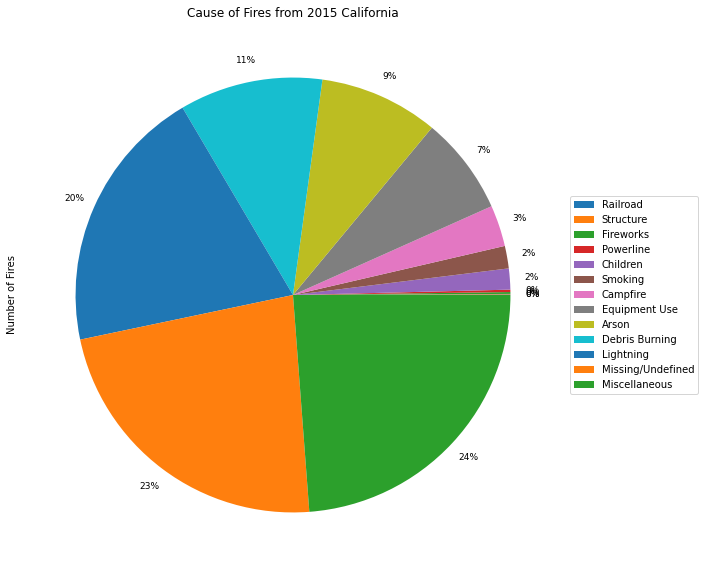

In [12]:
pie_cause = cause1.plot(kind = "pie", y="Number of Fires", labeldistance = None, figsize=(20,10), fontsize=9, autopct='%1.0f%%', pctdistance=1.1, title= "Cause of Fires from 2015 California")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("output/Figure1")

plt.show()

In [13]:
fire_data_year_state_tx_df = fire_data_year_df.loc[fire_data_year_df["STATE"] == "TX", :]
fire_data_year_state_tx_df.head()

,OBJECTID,FOD_ID,FPA_ID,FIRE_YEAR,FIPS_NAME,COMPLEX_NAME,FIRE_NAME,FIRE_SIZE,DISCOVERY_DATE,FIRE_CODE,STAT_CAUSE_DESCR,CONT_DATE,STATE,LATITUDE,LONGITUDE,DISCOVERY_TIME,CONT_TIME
1792266,1792267,300203558,FS-6363925,2015,Houston,NaN,526 FIRE,1.25,1970-01-29 10:35:05.500,J4GY,Arson,2457308.5,TX,31.534444,-95.159167,1930.0,1200.0
1792267,1792268,300203559,FS-6352546,2015,San Jacinto,NaN,RED ROAD,8.53,1970-01-29 10:34:37.500,EK28,Miscellaneous,2457277.5,TX,30.456667,-95.079444,1200.0,1500.0
1792268,1792269,300203560,FS-6341376,2015,Houston,NaN,562 FIRE,1.46,1970-01-29 10:34:00.500,J0ZT,Arson,2457241.5,TX,31.390833,-95.093333,1645.0,830.0
1792269,1792270,300203561,FS-6337350,2015,Trinity,NaN,515 FIRE,0.25,1970-01-29 10:33:46.500,JZ2F,Arson,2457226.5,TX,31.160278,-95.014167,1500.0,1700.0
1792270,1792271,300203562,FS-6342984,2015,Trinity,NaN,515-3 FIRE,0.10,1970-01-29 10:33:53.500,J0HX,Arson,2457233.5,TX,31.150000,-95.008333,1030.0,1250.0


In [14]:
#pie chart by fire cause

cause2 = fire_data_year_state_tx_df.groupby("STAT_CAUSE_DESCR")
cause2 = cause2.count()
cause2 = cause2[["OBJECTID"]]
cause2 = cause2.rename(columns = {"OBJECTID": "Number of Fires"})
cause2 = cause2.sort_values(by=['Number of Fires'])
cause2

,Number of Fires
STAT_CAUSE_DESCR,
Fireworks,1
Structure,4
Railroad,29
Missing/Undefined,48
Children,65
Campfire,93
Smoking,197
Lightning,200
Arson,216


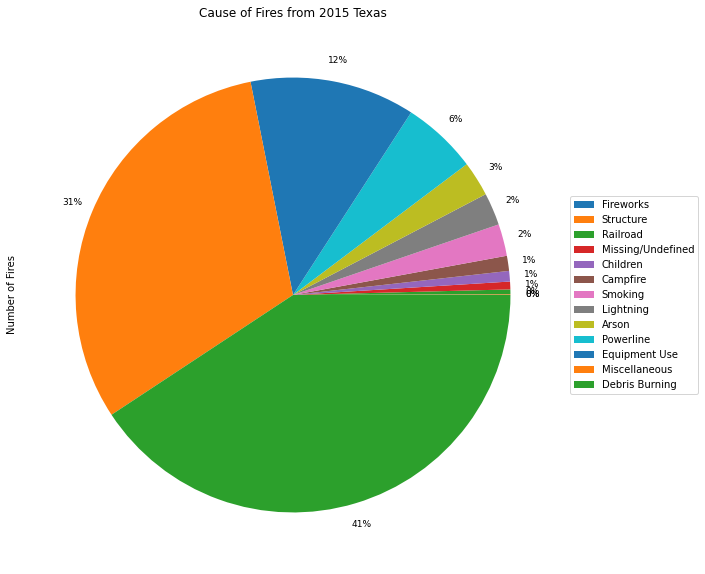

In [15]:
pie_cause = cause2.plot(kind = "pie", y="Number of Fires", labeldistance = None, figsize=(20,10), fontsize=9, autopct='%1.0f%%', pctdistance=1.1, title= "Cause of Fires from 2015 Texas")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("output/Figure1")

plt.show()